In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jadhavamit","key":"21cbb4e515e911e38a9962bc4bbedb80"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/ankanhore545/cost-of-living-index-2022                   Cost of Living Index 2022                           176KB  2022-03-26 04:56:04           1499         22  1.0              
datasets/piterfm/2022-ukraine-russian-war                         2022 Ukraine Russia War                               2KB  2022-04-02 13:30:10           4379        277  1.0              
datasets/kuchhbhi/latest-laptop-price-list                        Latest Laptop Price List                             19KB  2022-04-03 02:38:35            713         22  1.0              
datasets/kamilpytlak/personal-key-indicators-of-he

In [ ]:
!kaggle datasets download -d dhamur/cotton-plant-disease

100% 4.92G/4.93G [00:39<00:00, 153MB/s]
100% 4.93G/4.93G [00:39<00:00, 133MB/s]


In [ ]:
!unzip /content/cotton-plant-disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_11.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_12.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_13.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_14.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_15.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_16.jpeg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_17.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_18.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_19.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_2.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_20.jpg  
  inflating: Main dataset-20230209T170929Z-001/

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/Cotton leaves/40 Images', output="/content/Cotton leaves/output", seed=1337, ratio=(.7, 0.1,0.2)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 4788 files [00:18, 261.92 files/s]


# For train set:

In [ ]:
import os

base = '/content/Cotton leaves/output/train'

folders = os.listdir(base)

all_filenames = []

for folder_name in folders:

    # add base path to folder name to have full path
    full_path = os.path.join(base, folder_name)
    print(full_path)
    
    # get filenames (without path) in folder
    # filenames = os.listdir(full_path)
    
    # add path to filenames
    # filenames = [os.path.join(full_path, name) for name in filenames]
   
    all_filenames.append(full_path)
    
print(all_filenames)    

/content/Cotton leaves/output/train/Army worm
/content/Cotton leaves/output/train/Bacterial blight
/content/Cotton leaves/output/train/Healthy
/content/Cotton leaves/output/train/Powdery mildew
/content/Cotton leaves/output/train/Target spot
/content/Cotton leaves/output/train/Aphids
['/content/Cotton leaves/output/train/Army worm', '/content/Cotton leaves/output/train/Bacterial blight', '/content/Cotton leaves/output/train/Healthy', '/content/Cotton leaves/output/train/Powdery mildew', '/content/Cotton leaves/output/train/Target spot', '/content/Cotton leaves/output/train/Aphids']


In [ ]:
len(all_filenames)

6

In [ ]:
from glob import glob
train_path = '/content/Cotton leaves/output/train'

# useful for getting number of classes
folders = glob(train_path + '/*')
len(folders)

6

# For test set

In [ ]:
import os

base = '/content/Cotton leaves/output/test'

folders = os.listdir(base)

all_test_filenames = []

for folder_name in folders:

    # add base path to folder name to have full path
    full_path = os.path.join(base, folder_name)
    print(full_path)
    
    # get filenames (without path) in folder
    # filenames = os.listdir(full_path)
    
    # add path to filenames
    # filenames = [os.path.join(full_path, name) for name in filenames]
   
    all_test_filenames.append(full_path)
    
print(all_test_filenames)  

/content/Cotton leaves/output/test/Army worm
/content/Cotton leaves/output/test/Bacterial blight
/content/Cotton leaves/output/test/Healthy
/content/Cotton leaves/output/test/Powdery mildew
/content/Cotton leaves/output/test/Target spot
/content/Cotton leaves/output/test/Aphids
['/content/Cotton leaves/output/test/Army worm', '/content/Cotton leaves/output/test/Bacterial blight', '/content/Cotton leaves/output/test/Healthy', '/content/Cotton leaves/output/test/Powdery mildew', '/content/Cotton leaves/output/test/Target spot', '/content/Cotton leaves/output/test/Aphids']


In [ ]:
valid_path = '/content/Cotton leaves/output/test'

test_folders = glob(valid_path+ '/*')

len(test_folders)

6

# USING RESNET

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import itertools

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256, 256] # feel free to change depending on dataset

# training config:
epochs = 15
batch_size = 32

In [ ]:
train_path = '/content/Cotton leaves/output/train'
valid_path = '/content/Cotton leaves/output/test'

In [ ]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [ ]:
# useful for getting number of classes
folders = glob(train_path + '/*')

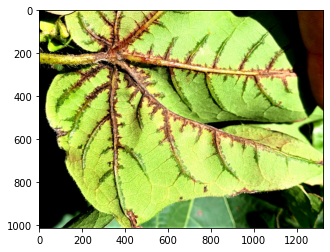

In [ ]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)));

In [ ]:
len(folders)

6

In [ ]:
# resnet base
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in res.layers:
  layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(res.output)
# x = Dense(1000, activation='relu')(x) # example
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=res.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# create an instance of ImageDataGenerator
train_gen = ImageDataGenerator(
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True,
  preprocessing_function=preprocess_input
)

val_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [ ]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot later
test_gen = val_gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 959 images belonging to 6 classes.
{'Aphids': 0, 'Army worm': 1, 'Bacterial blight': 2, 'Healthy': 3, 'Powdery mildew': 4, 'Target spot': 5}


min: -123.68 max: 151.061


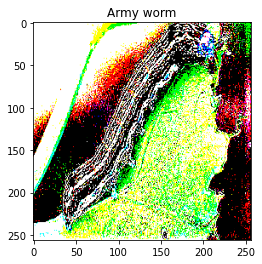

In [ ]:
# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [ ]:
# create generators
train_generator = train_gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)
valid_generator = val_gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
  class_mode='sparse',
)

Found 3351 images belonging to 6 classes.
Found 959 images belonging to 6 classes.


In [ ]:
# fit the model
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Epoch 1/15
104/104 [==============================] - 1411s 14s/step - loss: 3.8577 - accuracy: 0.8207 - val_loss: 1.1050 - val_accuracy: 0.9418
Epoch 2/15
104/104 [==============================] - 1387s 13s/step - loss: 1.5020 - accuracy: 0.9301 - val_loss: 1.9791 - val_accuracy: 0.9332
Epoch 3/15
104/104 [==============================] - 1325s 13s/step - loss: 1.1937 - accuracy: 0.9491 - val_loss: 1.6086 - val_accuracy: 0.9440
Epoch 4/15
104/104 [==============================] - 1347s 13s/step - loss: 0.8741 - accuracy: 0.9638 - val_loss: 1.2436 - val_accuracy: 0.9591
Epoch 5/15
104/104 [==============================] - 1320s 13s/step - loss: 0.7925 - accuracy: 0.9644 - val_loss: 1.5986 - val_accuracy: 0.9591
Epoch 6/15
104/104 [==============================] - 1388s 13s/step - loss: 0.7909 - accuracy: 0.9693 - val_loss: 2.4630 - val_accuracy: 0.9504
Epoch 7/15
104/104 [==============================] - 1392s 13s/step - loss: 1.0950 - accuracy: 0.9675 - val_loss: 1.3344 - val_ac

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model.save('cotton_disease_model.h5') 

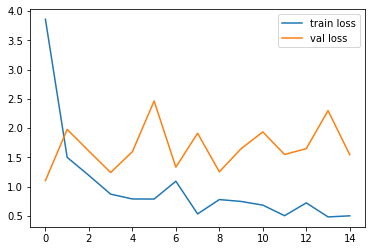

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

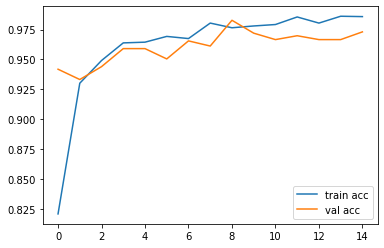

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [ ]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  n_images = 0
  for x, y in val_gen.flow_from_directory(
      data_path,
      target_size=IMAGE_SIZE,
      shuffle=False,
      batch_size=batch_size * 2):
    i += 1
    n_images += len(y)
    if i % 50 == 0:
      print(f'{n_images} images processed.')
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [ ]:
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 5038
Found 5038 images belonging to 100 classes.
[[29  1  0 ...  0  0  0]
 [ 2 17  0 ...  0  0  0]
 [ 1  0 42 ...  0  0  0]
 ...
 [ 0  0  2 ...  4  0  0]
 [ 0  0  0 ...  0 49  1]
 [ 0  0  0 ...  0 26 21]]


In [ ]:
from keras.models import load_model
# from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
# class_names = train_dataset.class_names

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model2 = load_model('cotton_disease_model.h5')
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# predicting images
img = load_img('/content/img1.jpg', target_size=(img_width,img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model2.predict(x, batch_size=32)
index = np.argmax(classes,axis=1)[0]
print(labels[index])

1/1 [==============================] - 3s 3s/step
Target spot


In [ ]:
def predict_disease(img_path = ''):
  from keras.models import load_model
  # from keras.preprocessing import image
  from keras.utils import load_img, img_to_array
  import numpy as np
  # class_names = train_dataset.class_names

  # dimensions of our images
  img_width, img_height = 256, 256

  # load the model we saved
  model2 = load_model('cotton_disease_model.h5')
  model2.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  # predicting images
  img = load_img(img_path, target_size=(img_width,img_height))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(x, batch_size=32)
  index = np.argmax(classes,axis=1)[0]
  print(labels[index])

In [ ]:
predict_scene('/content/img1.jpg')

1/1 [==============================] - 2s 2s/step
Target spot


In [ ]:
predict_scene('/content/img2.jpg')

1/1 [==============================] - 2s 2s/step
Powdery mildew


In [ ]:
labels

['Aphids',
 'Army worm',
 'Bacterial blight',
 'Healthy',
 'Powdery mildew',
 'Target spot']

In [ ]:
# Intergrate two models refer below code

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the cotton plant classifier model
plant_model = load_model('cotton_plant_classifier.h5')

# Load the cotton disease classifier model
disease_model = load_model('cotton_disease_classifier.h5')

# Define a function to process the input image
def process_image(image_path):
    # Load the image and resize it
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))

    # Convert the image to a 4D tensor
    image = np.expand_dims(image, axis=0)

    # Pass the image through the plant classifier
    plant_prediction = plant_model.predict(image)[0]

    # If the plant is not cotton, return None
    if plant_prediction[0] > plant_prediction[1]:
        return None

    # Pass the image through the disease classifier
    disease_prediction = disease_model.predict(image)[0]

    # Get the index of the predicted disease class
    disease_index = np.argmax(disease_prediction)

    # Get the predicted disease class label
    disease_labels = ['disease1', 'disease2', 'disease3', 'disease4']
    disease_label = disease_labels[disease_index]

    # Return the predicted disease label
    return disease_label

# Test the function with an example image
image_path = 'test_image.jpg'
disease_label = process_image(image_path)
print('Predicted disease:', disease_label)
